In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
purchase_hist = pd.read_excel("CASE_03_raw_data.xlsx", sheet_name=0)

In [5]:
purchase_hist.head()

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M
0,1,41,0,0
1,1,79,5,1
2,1,12,0,0
3,1,37,0,0
4,1,29,3,2


In [6]:
NBO_original_results = pd.read_excel("CASE_03_raw_data.xlsx", sheet_name=1)

In [7]:
NBO_original_results.head()

,Consumidor,NBO 1,NBO 2,NBO 3,NBO 4,NBO 5,Score NBO 1,Score NBO 2,Score NBO 3,Score NBO 4,Score NBO 5
0,1,14,28,40,54,71,0.77,0.54,0.71,0.53,0.82
1,2,15,31,49,51,80,0.69,0.60,0.97,0.51,0.54
2,3,10,33,36,51,78,0.97,0.62,0.89,0.96,0.87
3,4,9,24,44,61,68,0.78,0.90,0.95,0.94,0.97
4,5,3,29,41,60,80,0.77,0.80,0.70,0.59,0.77


### Exploratory Data Analysis

#### Purchase History Dataset

In [8]:
purchase_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048488 entries, 0 to 1048487
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype
---  ------              --------------    -----
 0   Consumidor          1048488 non-null  int64
 1   Produto             1048488 non-null  int64
 2   Quantidade Acc 12M  1048488 non-null  int64
 3   Quantidade Acc 6M   1048488 non-null  int64
dtypes: int64(4)
memory usage: 32.0 MB


In [9]:
purchase_hist.describe()

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M
count,1.048488e+06,1.048488e+06,1.048488e+06,1.048488e+06
mean,9.362000e+03,4.049336e+01,2.500416e+00,6.251087e-01
std,5.404867e+03,2.308226e+01,1.708274e+00,1.099130e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.681000e+03,2.100000e+01,1.000000e+00,0.000000e+00
50%,9.362000e+03,4.100000e+01,2.000000e+00,0.000000e+00
75%,1.404300e+04,6.000000e+01,4.000000e+00,1.000000e+00
max,1.872300e+04,8.000000e+01,5.000000e+00,5.000000e+00


In [10]:
purchase_hist.isnull().sum()

Consumidor            0
Produto               0
Quantidade Acc 12M    0
Quantidade Acc 6M     0
dtype: int64

In [11]:
purchase_hist.nunique()

Consumidor            18723
Produto                  80
Quantidade Acc 12M        6
Quantidade Acc 6M         6
dtype: int64

In [12]:
purchase_hist.columns

Index(['Consumidor', 'Produto', 'Quantidade Acc 12M', 'Quantidade Acc 6M'], dtype='object')

In [13]:
purchase_hist.memory_usage()

Index                     128
Consumidor            8387904
Produto               8387904
Quantidade Acc 12M    8387904
Quantidade Acc 6M     8387904
dtype: int64

In [14]:
purchase_hist[purchase_hist.duplicated() == True]

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M
53,1,33,0,0
93,2,73,1,0
96,2,53,0,0
136,3,48,2,0
162,3,4,4,0
...,...,...,...,...
1048315,18720,22,1,1
1048373,18721,77,0,0
1048399,18722,76,0,0
1048420,18722,79,0,0


Existem algumas linhas do dataset duplicadas, o que elas significam??

In [15]:
purchase_hist[purchase_hist.duplicated() == True].shape[0] / purchase_hist.shape[0] * 100

2.990019914391009

É apenas 3% do total!

In [16]:
purchase_hist['Produto'].value_counts()

56    13444
19    13387
3     13360
14    13291
76    13284
      ...  
30    12907
26    12885
12    12873
47    12847
13    12845
Name: Produto, Length: 80, dtype: int64

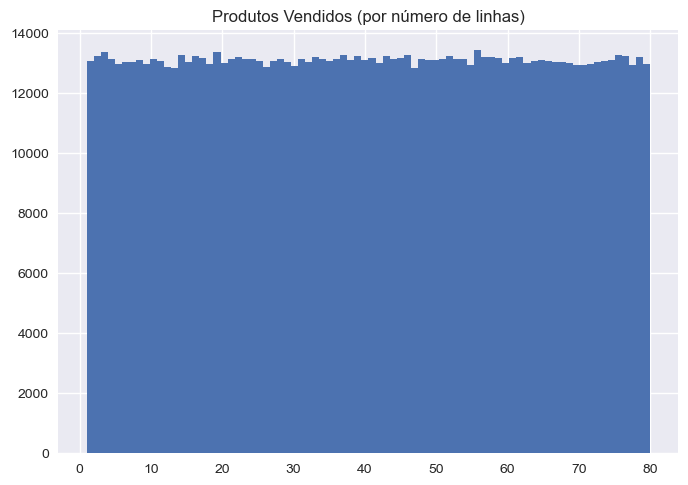

In [17]:
plt.hist(purchase_hist['Produto'], bins=purchase_hist['Produto'].value_counts().shape[0])
plt.title('Produtos Vendidos (por número de linhas)')
plt.show()

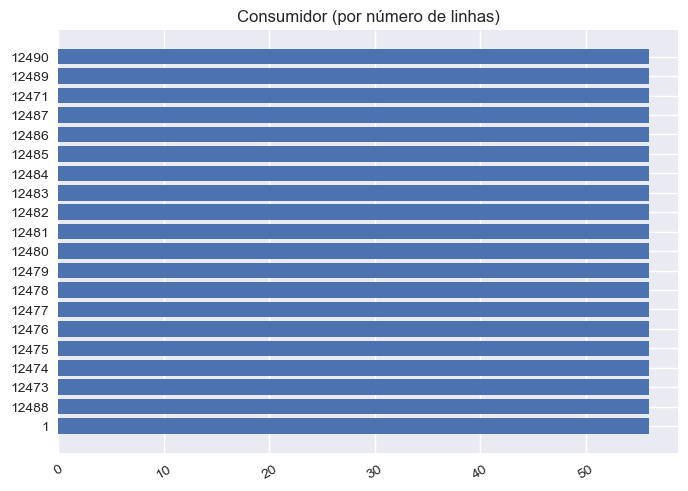

In [18]:
plt.barh(purchase_hist['Consumidor'].value_counts().nlargest(20).sort_values(ascending=True).index.astype('str'), purchase_hist['Consumidor'].value_counts().nlargest(20).sort_values(ascending=True).tolist())
plt.xticks(rotation=30)
plt.title('Consumidor (por número de linhas)')
plt.show()

In [19]:
purchase_hist.corr()

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M
Consumidor,1.000000,0.002434,0.001520,0.001223
Produto,0.002434,1.000000,-0.001048,-0.000238
Quantidade Acc 12M,0.001520,-0.001048,1.000000,0.388750
Quantidade Acc 6M,0.001223,-0.000238,0.388750,1.000000


#### NBO Original Results Dataset

In [20]:
NBO_original_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumidor   18723 non-null  int64  
 1   NBO 1        18723 non-null  int64  
 2   NBO 2        18723 non-null  int64  
 3   NBO 3        18723 non-null  int64  
 4   NBO 4        18723 non-null  int64  
 5   NBO 5        18723 non-null  int64  
 6   Score NBO 1  18723 non-null  float64
 7   Score NBO 2  18723 non-null  float64
 8   Score NBO 3  18723 non-null  float64
 9   Score NBO 4  18723 non-null  float64
 10  Score NBO 5  18723 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 1.6 MB


In [21]:
NBO_original_results.describe()

,Consumidor,NBO 1,NBO 2,NBO 3,NBO 4,NBO 5,Score NBO 1,Score NBO 2,Score NBO 3,Score NBO 4,Score NBO 5
count,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000,18723.000000
mean,9362.000000,10.573733,27.017465,42.056668,58.506489,73.476206,0.743982,0.744219,0.745353,0.746370,0.744942
std,5405.008881,5.777888,3.740867,4.917647,4.625143,4.025345,0.138875,0.138933,0.138362,0.138453,0.138809
min,1.000000,1.000000,21.000000,34.000000,51.000000,67.000000,0.510000,0.510000,0.510000,0.510000,0.510000
25%,4681.500000,6.000000,24.000000,38.000000,55.000000,70.000000,0.620000,0.620000,0.630000,0.630000,0.620000
50%,9362.000000,11.000000,27.000000,42.000000,58.000000,73.000000,0.740000,0.740000,0.750000,0.750000,0.740000
75%,14042.500000,16.000000,30.000000,46.000000,63.000000,77.000000,0.870000,0.870000,0.860000,0.870000,0.870000
max,18723.000000,20.000000,33.000000,50.000000,66.000000,80.000000,0.980000,0.980000,0.980000,0.980000,0.980000


The system is mainly recommending the first 20 products as NBO 1, the first 33 products as NBO 2, the first 50 products for NBO 3, the first 66 products for NBO 4 and can offer any product on NBO 5.

In [22]:
NBO_original_results.isnull().sum()

Consumidor     0
NBO 1          0
NBO 2          0
NBO 3          0
NBO 4          0
NBO 5          0
Score NBO 1    0
Score NBO 2    0
Score NBO 3    0
Score NBO 4    0
Score NBO 5    0
dtype: int64

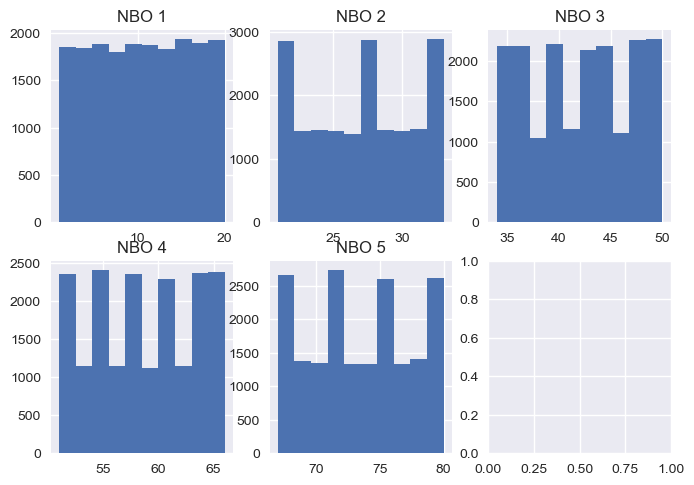

In [23]:
fig, ax = plt.subplots(2, 3)
ax[0, 0].hist(NBO_original_results['NBO 1'], )
ax[0, 0].set_title('NBO 1')
ax[0, 1].hist(NBO_original_results['NBO 2'])
ax[0, 1].set_title('NBO 2')
ax[0, 2].hist(NBO_original_results['NBO 3'])
ax[0, 2].set_title('NBO 3')
ax[1, 0].hist(NBO_original_results['NBO 4'])
ax[1, 0].set_title('NBO 4')
ax[1, 1].hist(NBO_original_results['NBO 5'])
ax[1, 1].set_title('NBO 5')
plt.show()

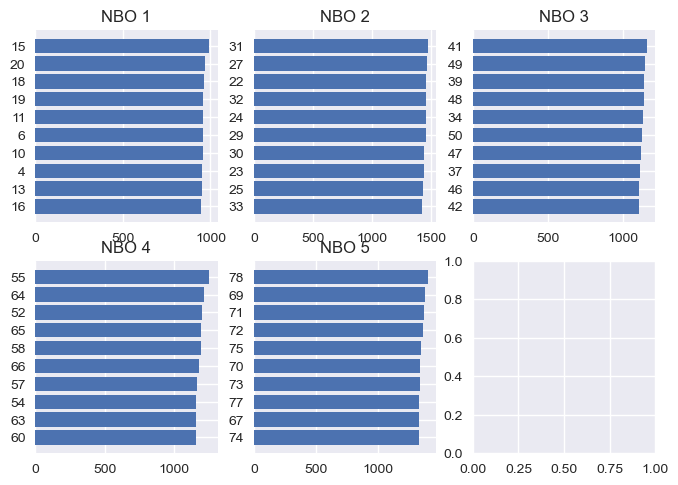

In [24]:
fig, ax = plt.subplots(2, 3)
ax[0, 0].barh(NBO_original_results['NBO 1'].value_counts(ascending=True).tail(10).index.astype('str'), NBO_original_results['NBO 1'].value_counts(ascending=True).tail(10).tolist())
ax[0, 0].set_title('NBO 1')
ax[0, 1].barh(NBO_original_results['NBO 2'].value_counts(ascending=True).tail(10).index.astype('str'), NBO_original_results['NBO 2'].value_counts(ascending=True).tail(10).tolist())
ax[0, 1].set_title('NBO 2')
ax[0, 2].barh(NBO_original_results['NBO 3'].value_counts(ascending=True).tail(10).index.astype('str'), NBO_original_results['NBO 3'].value_counts(ascending=True).tail(10).tolist())
ax[0, 2].set_title('NBO 3')
ax[1, 0].barh(NBO_original_results['NBO 4'].value_counts(ascending=True).tail(10).index.astype('str'), NBO_original_results['NBO 4'].value_counts(ascending=True).tail(10).tolist())
ax[1, 0].set_title('NBO 4')
ax[1, 1].barh(NBO_original_results['NBO 5'].value_counts(ascending=True).tail(10).index.astype('str'), NBO_original_results['NBO 5'].value_counts(ascending=True).tail(10).tolist())
ax[1, 1].set_title('NBO 5')
plt.show()

### Joining Datasets

In [25]:
joined_dataset = purchase_hist.copy()
joined_dataset.describe()

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M
count,1.048488e+06,1.048488e+06,1.048488e+06,1.048488e+06
mean,9.362000e+03,4.049336e+01,2.500416e+00,6.251087e-01
std,5.404867e+03,2.308226e+01,1.708274e+00,1.099130e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.681000e+03,2.100000e+01,1.000000e+00,0.000000e+00
50%,9.362000e+03,4.100000e+01,2.000000e+00,0.000000e+00
75%,1.404300e+04,6.000000e+01,4.000000e+00,1.000000e+00
max,1.872300e+04,8.000000e+01,5.000000e+00,5.000000e+00


In [26]:
joined_dataset['Quantidade Vendida'] = 1
joined_dataset.head()

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M,Quantidade Vendida
0,1,41,0,0,1
1,1,79,5,1,1
2,1,12,0,0,1
3,1,37,0,0,1
4,1,29,3,2,1


In [27]:
support_NBO_table = NBO_original_results.copy()

In [28]:
support_NBO_table['Consumidor_NBO1'] = support_NBO_table['Consumidor'].astype('str') + '_' + support_NBO_table['NBO 1'].astype('str')
support_NBO_table['Consumidor_NBO2'] = support_NBO_table['Consumidor'].astype('str') + '_' + support_NBO_table['NBO 2'].astype('str')
support_NBO_table['Consumidor_NBO3'] = support_NBO_table['Consumidor'].astype('str') + '_' + support_NBO_table['NBO 3'].astype('str')
support_NBO_table['Consumidor_NBO4'] = support_NBO_table['Consumidor'].astype('str') + '_' + support_NBO_table['NBO 4'].astype('str')
support_NBO_table['Consumidor_NBO5'] = support_NBO_table['Consumidor'].astype('str') + '_' + support_NBO_table['NBO 5'].astype('str')
support_NBO_table.head()

,Consumidor,NBO 1,NBO 2,NBO 3,NBO 4,NBO 5,Score NBO 1,Score NBO 2,Score NBO 3,Score NBO 4,Score NBO 5,Consumidor_NBO1,Consumidor_NBO2,Consumidor_NBO3,Consumidor_NBO4,Consumidor_NBO5
0,1,14,28,40,54,71,0.77,0.54,0.71,0.53,0.82,1_14,1_28,1_40,1_54,1_71
1,2,15,31,49,51,80,0.69,0.60,0.97,0.51,0.54,2_15,2_31,2_49,2_51,2_80
2,3,10,33,36,51,78,0.97,0.62,0.89,0.96,0.87,3_10,3_33,3_36,3_51,3_78
3,4,9,24,44,61,68,0.78,0.90,0.95,0.94,0.97,4_9,4_24,4_44,4_61,4_68
4,5,3,29,41,60,80,0.77,0.80,0.70,0.59,0.77,5_3,5_29,5_41,5_60,5_80


In [29]:
# Joining NBO 1 com purchase_hist
if 'key_0' in joined_dataset.columns:
    joined_dataset.drop(columns='key_0', inplace=True)
joined_dataset['Consumidor_Produto1'] = joined_dataset['Consumidor'].astype('str') + '_' + joined_dataset['Produto'].astype('str')
joined_dataset = joined_dataset.merge(support_NBO_table['NBO 1'], how="left", left_on=joined_dataset['Consumidor_Produto1'], right_on=support_NBO_table['Consumidor_NBO1'], indicator='')

# Joining NBO 2 com purchase_hist
if 'key_0' in joined_dataset.columns:
    joined_dataset.drop(columns='key_0', inplace=True)
joined_dataset = joined_dataset.merge(support_NBO_table['NBO 2'], how="left", left_on=joined_dataset['Consumidor_Produto1'], right_on=support_NBO_table['Consumidor_NBO2'],  indicator='')

# Joining NBO 3 com purchase_hist
if 'key_0' in joined_dataset.columns:
    joined_dataset.drop(columns='key_0', inplace=True)
joined_dataset = joined_dataset.merge(support_NBO_table['NBO 3'], how="left", left_on=joined_dataset['Consumidor_Produto1'], right_on=support_NBO_table['Consumidor_NBO3'], indicator='')

# Joining NBO 4 com purchase_hist
if 'key_0' in joined_dataset.columns:
    joined_dataset.drop(columns='key_0', inplace=True)
joined_dataset = joined_dataset.merge(support_NBO_table['NBO 4'], how="left", left_on=joined_dataset['Consumidor_Produto1'], right_on=support_NBO_table['Consumidor_NBO4'], indicator='')

# Joining NBO 5 com purchase_hist
if 'key_0' in joined_dataset.columns:
    joined_dataset.drop(columns='key_0', inplace=True)
joined_dataset = joined_dataset.merge(support_NBO_table['NBO 5'], how="left", left_on=joined_dataset['Consumidor_Produto1'], right_on=support_NBO_table['Consumidor_NBO5'], indicator='')

joined_dataset.head()

,key_0,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M,Quantidade Vendida,Consumidor_Produto1,NBO 1,NBO 2,NBO 3,NBO 4,NBO 5
0,1_41,1,41,0,0,1,1_41,NaN,NaN,NaN,NaN,NaN
1,1_79,1,79,5,1,1,1_79,NaN,NaN,NaN,NaN,NaN
2,1_12,1,12,0,0,1,1_12,NaN,NaN,NaN,NaN,NaN
3,1_37,1,37,0,0,1,1_37,NaN,NaN,NaN,NaN,NaN
4,1_29,1,29,3,2,1,1_29,NaN,NaN,NaN,NaN,NaN


In [30]:
joined_dataset.drop(columns=['key_0', 'Consumidor_Produto1'], inplace=True)
joined_dataset.head()

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M,Quantidade Vendida,NBO 1,NBO 2,NBO 3,NBO 4,NBO 5
0,1,41,0,0,1,NaN,NaN,NaN,NaN,NaN
1,1,79,5,1,1,NaN,NaN,NaN,NaN,NaN
2,1,12,0,0,1,NaN,NaN,NaN,NaN,NaN
3,1,37,0,0,1,NaN,NaN,NaN,NaN,NaN
4,1,29,3,2,1,NaN,NaN,NaN,NaN,NaN


In [31]:
# Cálculo de percentual indicação de produtos já vendidos para clientes
NBO_1 = joined_dataset[joined_dataset['NBO 1'].notnull()]['Quantidade Vendida'].sum() / joined_dataset['Quantidade Vendida'].sum()
NBO_2 = joined_dataset[joined_dataset['NBO 2'].notnull()]['Quantidade Vendida'].sum() / joined_dataset['Quantidade Vendida'].sum()
NBO_3 = joined_dataset[joined_dataset['NBO 3'].notnull()]['Quantidade Vendida'].sum() / joined_dataset['Quantidade Vendida'].sum()
NBO_4 = joined_dataset[joined_dataset['NBO 4'].notnull()]['Quantidade Vendida'].sum() / joined_dataset['Quantidade Vendida'].sum()
NBO_5 = joined_dataset[joined_dataset['NBO 5'].notnull()]['Quantidade Vendida'].sum() / joined_dataset['Quantidade Vendida'].sum()

# Percentual de indicação para cada NBO
print('NBO 1: {:.4%}'.format(NBO_1))
print('NBO 2: {:.4%}'.format(NBO_2))
print('NBO 3: {:.4%}'.format(NBO_3))
print('NBO 4: {:.4%}'.format(NBO_4))
print('NBO 5: {:.4%}'.format(NBO_5))

NBO 1: 1.2493%
NBO 2: 1.2569%
NBO 3: 1.2511%
NBO 4: 1.2451%
NBO 5: 1.2474%


A recomendação de produtos já vendidos acontece em menos de 1,5% dos clientes

### Criando o DataFrame para aplicação do KNN

In [32]:
purchase_hist['Quantidade Vendida'] = 1
purchase_hist.head()

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M,Quantidade Vendida
0,1,41,0,0,1
1,1,79,5,1,1
2,1,12,0,0,1
3,1,37,0,0,1
4,1,29,3,2,1


In [33]:
# Tratando colunas duplicadas como somas
ts = purchase_hist.groupby(['Consumidor', 'Produto']).sum()
ts = ts.reset_index(level=['Consumidor', 'Produto'])
ts

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M,Quantidade Vendida
0,1,2,3,2,1
1,1,12,0,0,1
2,1,13,1,0,1
3,1,14,0,0,1
4,1,16,5,5,1
...,...,...,...,...,...
757806,18723,73,0,0,1
757807,18723,75,12,3,3
757808,18723,76,1,1,1
757809,18723,78,6,2,2


In [35]:
ready_dataset = ts.pivot(index="Consumidor", columns="Produto", values="Quantidade Vendida")
ready_dataset_12M = ts.pivot(index="Consumidor", columns="Produto", values="Quantidade Acc 12M")
ready_dataset_6M = ts.pivot(index="Consumidor", columns="Produto", values="Quantidade Acc 6M")
ready_dataset_agg = ts.pivot(index="Consumidor", columns="Produto", values=["Quantidade Vendida","Quantidade Acc 12M","Quantidade Acc 6M"])

ready_dataset.head()

Produto,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
Consumidor,,,,,,,,,,,,,,,,,,,,,
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,1.0,2.0,1.0,1.0,NaN
2,NaN,1.0,NaN,2.0,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,1.0,4.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,NaN,NaN,NaN,3.0,NaN,2.0,1.0,3.0,1.0,NaN,...,NaN,2.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,2.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,...,NaN,2.0,NaN,NaN,1.0,3.0,NaN,NaN,2.0,1.0
5,1.0,1.0,NaN,2.0,2.0,1.0,1.0,1.0,1.0,NaN,...,2.0,NaN,NaN,1.0,NaN,1.0,NaN,2.0,1.0,1.0


In [36]:
# Substituindo valores 'Nan'
ready_dataset = ready_dataset.fillna(0)
ready_dataset.head()

Produto,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
Consumidor,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,2.0,1.0,1.0,0.0
2,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,3.0,0.0,2.0,1.0,3.0,1.0,0.0,...,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,1.0
5,1.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0


In [37]:
# Salvar tabela com valores normalizados para futua referência
ready_dataset_normalized = (ready_dataset - ready_dataset.mean()) / ready_dataset.std()

### By Similarity

In [38]:
from operator import itemgetter
from heapq import nlargest

In [39]:
ready_dataset.head()

Produto,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
Consumidor,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,2.0,1.0,1.0,0.0
2,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,3.0,0.0,2.0,1.0,3.0,1.0,0.0,...,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,1.0
5,1.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0


In [40]:
def train_KNN(data, N=5):
    """
    Function to train and find N-neighbors based on cosine distance calculation. 
    Returns a dict containing a customer and cosine distance to each other customers.
    """
    dist_dict = {}
    np_dataset = data.fillna(0).to_numpy()
    mod_np_dataset = np.sqrt(np.sum(np_dataset ** 2, axis=1))
    Consumer = 1
    close_consumers = np.arange(N + 1)

    for row in np_dataset:
        mod_row = np.sqrt(np.sum(row ** 2))
        denominator = mod_row * mod_np_dataset
        numerator = np.sum(row * np_dataset, axis=1)
        cosine = numerator / denominator
        cosine_dict = dict(enumerate(cosine.flatten(), start=1))

        # Usar caso queira ver os valores de cada distância entre vetores
        # sorted_cosine_dict = dict(sorted(cosine_dict.items(), key=itemgetter(1), reverse=True)[:N + 1])
        sorted_cosine_dict = dict(zip(close_consumers, nlargest(N + 1, cosine_dict, key=cosine_dict.get)))
        dist_dict[Consumer] = sorted_cosine_dict
        Consumer += 1
    return dist_dict

In [41]:
dist_dict = train_KNN(ready_dataset, 5)

In [76]:
new_dataset = pd.DataFrame.from_dict(dist_dict).T
new_dataset = new_dataset.rename(columns={0:"Consumidor", 1:"Neighbor_1", 2:"Neighbor_2", 3:"Neighbor_3", 4:"Neighbor_4", 5:"Neighbor_5"})
new_dataset.head()

,Consumidor,Neighbor_1,Neighbor_2,Neighbor_3,Neighbor_4,Neighbor_5
1,1,18593,12693,18569,3096,10844
2,2,10724,3214,7636,82,11961
3,3,17946,16886,10366,6551,16959
4,4,7441,5610,15170,16199,15412
5,5,8065,1015,10689,12963,1885


In [77]:
# Creating copies for suffix purposes
ready_dataset_N1 = ready_dataset.copy()
ready_dataset_N1.columns = ready_dataset_N1.columns.map(lambda x: str(x) + '_N1')
ready_dataset_N2 = ready_dataset.copy()
ready_dataset_N2.columns = ready_dataset_N2.columns.map(lambda x: str(x) + '_N2')
ready_dataset_N3 = ready_dataset.copy()
ready_dataset_N3.columns = ready_dataset_N3.columns.map(lambda x: str(x) + '_N3')
ready_dataset_N4 = ready_dataset.copy()
ready_dataset_N4.columns = ready_dataset_N4.columns.map(lambda x: str(x) + '_N4')
ready_dataset_N5 = ready_dataset.copy()
ready_dataset_N5.columns = ready_dataset_N5.columns.map(lambda x: str(x) + '_N5')


# Joining Consumidor product_parameters
if 'key_0' in new_dataset.columns:
    new_dataset.drop(columns='key_0', inplace=True)

new_dataset = new_dataset.merge(ready_dataset, how="left", left_on=new_dataset["Consumidor"], right_on=ready_dataset.index)

# Joining Neighbor_1 product_parameters
if 'key_0' in new_dataset.columns:
    new_dataset.drop(columns='key_0', inplace=True)

new_dataset = new_dataset.merge(ready_dataset_N1, how="left", left_on=new_dataset["Neighbor_1"], right_on=ready_dataset_N1.index)

# Joining Neighbor_2 product_parameters
if 'key_0' in new_dataset.columns:
    new_dataset.drop(columns='key_0', inplace=True)

new_dataset = new_dataset.merge(ready_dataset_N2, how="left", left_on=new_dataset["Neighbor_2"], right_on=ready_dataset_N2.index)

# Joining Neighbor_3 product_parameters
if 'key_0' in new_dataset.columns:
    new_dataset.drop(columns='key_0', inplace=True)

new_dataset = new_dataset.merge(ready_dataset_N3, how="left", left_on=new_dataset["Neighbor_3"], right_on=ready_dataset_N3.index)

# Joining Neighbor_4 product_parameters
if 'key_0' in new_dataset.columns:
    new_dataset.drop(columns='key_0', inplace=True)

new_dataset = new_dataset.merge(ready_dataset_N4, how="left", left_on=new_dataset["Neighbor_4"], right_on=ready_dataset_N4.index)

# Joining Neighbor_5 product_parameters
if 'key_0' in new_dataset.columns:
    new_dataset.drop(columns='key_0', inplace=True)

new_dataset = new_dataset.merge(ready_dataset_N5, how="left", left_on=new_dataset["Neighbor_5"], right_on=ready_dataset_N5.index)

new_dataset.head()

,key_0,Consumidor,Neighbor_1,Neighbor_2,Neighbor_3,Neighbor_4,Neighbor_5,1,2,3,...,71_N5,72_N5,73_N5,74_N5,75_N5,76_N5,77_N5,78_N5,79_N5,80_N5
0,10844,1,18593,12693,18569,3096,10844,0.0,1.0,0.0,...,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0
1,11961,2,10724,3214,7636,82,11961,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0
2,16959,3,17946,16886,10366,6551,16959,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
3,15412,4,7441,5610,15170,16199,15412,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0
4,1885,5,8065,1015,10689,12963,1885,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
# Removendo coluna 'key_0'
if 'key_0' in new_dataset.columns:
    new_dataset.drop(columns='key_0', inplace=True)

new_dataset.head()

,Consumidor,Neighbor_1,Neighbor_2,Neighbor_3,Neighbor_4,Neighbor_5,1,2,3,4,...,71_N5,72_N5,73_N5,74_N5,75_N5,76_N5,77_N5,78_N5,79_N5,80_N5
0,1,18593,12693,18569,3096,10844,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2,10724,3214,7636,82,11961,0.0,1.0,0.0,2.0,...,1.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0
2,3,17946,16886,10366,6551,16959,0.0,0.0,0.0,3.0,...,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,7441,5610,15170,16199,15412,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0
4,5,8065,1015,10689,12963,1885,1.0,1.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
# Calculando a média de itens adquiridos para os 5 consumidores mais próximos
for i in range(80):
    str_i = "^" + str(i + 1) + "_"
    str_ii = str(i + 1)
    new_dataset[f'Final_{str_ii}'] = new_dataset.filter(regex=f'{str_i}').mean(axis=1)
    
new_dataset.head()

,Consumidor,Neighbor_1,Neighbor_2,Neighbor_3,Neighbor_4,Neighbor_5,1,2,3,4,...,Final_71,Final_72,Final_73,Final_74,Final_75,Final_76,Final_77,Final_78,Final_79,Final_80
0,1,18593,12693,18569,3096,10844,0.0,1.0,0.0,0.0,...,0.2,0.6,0.4,1.2,0.6,1.0,0.6,0.4,1.0,0.6
1,2,10724,3214,7636,82,11961,0.0,1.0,0.0,2.0,...,0.2,0.6,2.2,0.2,0.2,0.2,0.4,1.2,0.8,0.2
2,3,17946,16886,10366,6551,16959,0.0,0.0,0.0,3.0,...,1.0,0.8,0.8,0.6,1.0,1.6,0.6,0.6,0.2,0.4
3,4,7441,5610,15170,16199,15412,2.0,0.0,0.0,0.0,...,0.2,1.2,0.2,0.6,0.4,1.6,0.4,0.4,1.0,0.6
4,5,8065,1015,10689,12963,1885,1.0,1.0,0.0,2.0,...,0.6,0.8,0.0,0.4,0.4,0.8,0.2,1.2,0.8,0.4


In [80]:
# Removendo vendas já realizadas pelos próprios consumidores
col = 1
weight = 0.5

for i in range(80):
    str_i = "^" + str(i + 1) + "_"
    str_ii = str(i + 1)
    new_dataset[f'Final_{str_ii}'] -= weight * new_dataset[col]
    col += 1
new_dataset.head()

,Consumidor,Neighbor_1,Neighbor_2,Neighbor_3,Neighbor_4,Neighbor_5,1,2,3,4,...,Final_71,Final_72,Final_73,Final_74,Final_75,Final_76,Final_77,Final_78,Final_79,Final_80
0,1,18593,12693,18569,3096,10844,0.0,1.0,0.0,0.0,...,0.2,0.6,0.4,-0.3,0.6,0.5,-0.4,-0.1,0.5,0.6
1,2,10724,3214,7636,82,11961,0.0,1.0,0.0,2.0,...,0.2,0.1,0.2,0.2,0.2,0.2,0.4,0.7,0.3,0.2
2,3,17946,16886,10366,6551,16959,0.0,0.0,0.0,3.0,...,1.0,-0.2,0.3,0.6,1.0,1.1,0.6,0.1,0.2,0.4
3,4,7441,5610,15170,16199,15412,2.0,0.0,0.0,0.0,...,0.2,0.2,0.2,0.6,-0.1,0.1,0.4,0.4,0.0,0.1
4,5,8065,1015,10689,12963,1885,1.0,1.0,0.0,2.0,...,-0.4,0.8,0.0,-0.1,0.4,0.3,0.2,0.2,0.3,-0.1


A variável 'weight' pode ser utilizada/reduzida quando quisermos dar mais peso para as compras já realizadas

In [81]:
# Dataset temporario transposto
new_dataset_T = new_dataset.filter(regex="^Final_").T.reset_index().rename(columns={'index':'Produto'})
new_dataset_T['Produto'] = new_dataset_T['Produto'].str.replace('Final_','')

new_dataset_T.head()

,Produto,0,1,2,3,4,5,6,7,8,...,18713,18714,18715,18716,18717,18718,18719,18720,18721,18722
0,1,0.6,0.8,0.8,-0.6,-0.1,0.0,0.0,0.4,0.3,...,0.2,0.6,0.6,0.6,0.4,0.3,0.7,0.4,1.0,0.0
1,2,0.1,0.9,0.2,0.0,0.5,0.4,0.6,0.2,0.2,...,0.2,0.3,0.6,0.6,-0.1,0.8,0.2,-0.1,0.4,-0.3
2,3,0.2,0.2,0.4,0.4,0.4,0.8,0.3,0.0,0.1,...,0.8,0.1,1.6,0.6,0.5,0.4,0.4,0.2,-0.1,0.2
3,4,0.2,-0.2,0.3,1.0,0.0,0.2,0.5,0.1,-0.2,...,0.1,0.5,0.0,0.3,0.5,0.4,0.8,0.3,-0.3,0.2
4,5,0.2,0.8,0.0,0.3,0.2,0.4,0.4,0.2,0.6,...,0.6,0.5,0.6,0.2,1.0,0.2,0.4,1.5,-0.1,0.6


In [82]:
# Calculando os 5 NBOs recomendados para cada Consumidor
def NBO_find(N):
    """Find the produtcts that should be recommendde to each customer"""
    NBO_dict = {}
    col = 0

    for i in range(new_dataset.shape[0]):
        dict_values = new_dataset_T[["Produto", i]].nlargest(N, columns=i)["Produto"].values
        col += 1
        NBO_dict[col] = dict_values
    return NBO_dict

In [83]:
NBO_dict = NBO_find(5)

In [84]:
# Montando a tabela final
NBO_result = pd.DataFrame.from_dict(NBO_dict).T
NBO_result = NBO_result.reset_index()
NBO_result = NBO_result.rename(columns={"index":"Consumidor", 0: "NBO_1", 1: "NBO_2", 2: "NBO_3", 3: "NBO_4", 4: "NBO_5"})

NBO_result.head()

,Consumidor,NBO_1,NBO_2,NBO_3,NBO_4,NBO_5
0,1,69,61,18,36,49
1,2,59,60,28,61,68
2,3,6,20,68,76,71
3,4,44,64,32,4,18
4,5,12,44,67,23,10


### Testando Recomendação de Produtos já vendidos

In [85]:
new_joined_dataset = purchase_hist.copy()
new_joined_dataset.head()

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M,Quantidade Vendida
0,1,41,0,0,1
1,1,79,5,1,1
2,1,12,0,0,1
3,1,37,0,0,1
4,1,29,3,2,1


In [86]:
new_support_NBO_table = NBO_result.copy()
new_support_NBO_table.head()

,Consumidor,NBO_1,NBO_2,NBO_3,NBO_4,NBO_5
0,1,69,61,18,36,49
1,2,59,60,28,61,68
2,3,6,20,68,76,71
3,4,44,64,32,4,18
4,5,12,44,67,23,10


In [87]:
new_support_NBO_table['Consumidor_NBO1'] = new_support_NBO_table['Consumidor'].astype('str') + '_' + new_support_NBO_table['NBO_1'].astype('str')
new_support_NBO_table['Consumidor_NBO2'] = new_support_NBO_table['Consumidor'].astype('str') + '_' + new_support_NBO_table['NBO_2'].astype('str')
new_support_NBO_table['Consumidor_NBO3'] = new_support_NBO_table['Consumidor'].astype('str') + '_' + new_support_NBO_table['NBO_3'].astype('str')
new_support_NBO_table['Consumidor_NBO4'] = new_support_NBO_table['Consumidor'].astype('str') + '_' + new_support_NBO_table['NBO_4'].astype('str')
new_support_NBO_table['Consumidor_NBO5'] = new_support_NBO_table['Consumidor'].astype('str') + '_' + new_support_NBO_table['NBO_5'].astype('str')
new_support_NBO_table.head()

,Consumidor,NBO_1,NBO_2,NBO_3,NBO_4,NBO_5,Consumidor_NBO1,Consumidor_NBO2,Consumidor_NBO3,Consumidor_NBO4,Consumidor_NBO5
0,1,69,61,18,36,49,1_69,1_61,1_18,1_36,1_49
1,2,59,60,28,61,68,2_59,2_60,2_28,2_61,2_68
2,3,6,20,68,76,71,3_6,3_20,3_68,3_76,3_71
3,4,44,64,32,4,18,4_44,4_64,4_32,4_4,4_18
4,5,12,44,67,23,10,5_12,5_44,5_67,5_23,5_10


In [88]:
# Joining NBO 1 com purchase_hist
if 'key_0' in new_joined_dataset.columns:
    new_joined_dataset.drop(columns='key_0', inplace=True)
new_joined_dataset['Consumidor_Produto1'] = new_joined_dataset['Consumidor'].astype('str') + '_' + new_joined_dataset['Produto'].astype('str')
new_joined_dataset = new_joined_dataset.merge(new_support_NBO_table['NBO_1'], how="left", left_on=new_joined_dataset['Consumidor_Produto1'], right_on=new_support_NBO_table['Consumidor_NBO1'], indicator='')

# Joining NBO 2 com purchase_hist
if 'key_0' in new_joined_dataset.columns:
    new_joined_dataset.drop(columns='key_0', inplace=True)
new_joined_dataset = new_joined_dataset.merge(new_support_NBO_table['NBO_2'], how="left", left_on=new_joined_dataset['Consumidor_Produto1'], right_on=new_support_NBO_table['Consumidor_NBO2'],  indicator='')

# Joining NBO 3 com purchase_hist
if 'key_0' in new_joined_dataset.columns:
    new_joined_dataset.drop(columns='key_0', inplace=True)
new_joined_dataset = new_joined_dataset.merge(new_support_NBO_table['NBO_3'], how="left", left_on=new_joined_dataset['Consumidor_Produto1'], right_on=new_support_NBO_table['Consumidor_NBO3'], indicator='')

# Joining NBO 4 com purchase_hist
if 'key_0' in new_joined_dataset.columns:
    new_joined_dataset.drop(columns='key_0', inplace=True)
new_joined_dataset = new_joined_dataset.merge(new_support_NBO_table['NBO_4'], how="left", left_on=new_joined_dataset['Consumidor_Produto1'], right_on=new_support_NBO_table['Consumidor_NBO4'], indicator='')

# Joining NBO 5 com purchase_hist
if 'key_0' in new_joined_dataset.columns:
    new_joined_dataset.drop(columns='key_0', inplace=True)
new_joined_dataset = new_joined_dataset.merge(new_support_NBO_table['NBO_5'], how="left", left_on=new_joined_dataset['Consumidor_Produto1'], right_on=new_support_NBO_table['Consumidor_NBO5'], indicator='')

new_joined_dataset.head()

,key_0,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M,Quantidade Vendida,Consumidor_Produto1,NBO_1,NBO_2,NBO_3,NBO_4,NBO_5
0,1_41,1,41,0,0,1,1_41,NaN,NaN,NaN,NaN,NaN
1,1_79,1,79,5,1,1,1_79,NaN,NaN,NaN,NaN,NaN
2,1_12,1,12,0,0,1,1_12,NaN,NaN,NaN,NaN,NaN
3,1_37,1,37,0,0,1,1_37,NaN,NaN,NaN,NaN,NaN
4,1_29,1,29,3,2,1,1_29,NaN,NaN,NaN,NaN,NaN


In [89]:
new_joined_dataset.drop(columns=['key_0', 'Consumidor_Produto1'], inplace=True)
new_joined_dataset.head()

,Consumidor,Produto,Quantidade Acc 12M,Quantidade Acc 6M,Quantidade Vendida,NBO_1,NBO_2,NBO_3,NBO_4,NBO_5
0,1,41,0,0,1,NaN,NaN,NaN,NaN,NaN
1,1,79,5,1,1,NaN,NaN,NaN,NaN,NaN
2,1,12,0,0,1,NaN,NaN,NaN,NaN,NaN
3,1,37,0,0,1,NaN,NaN,NaN,NaN,NaN
4,1,29,3,2,1,NaN,NaN,NaN,NaN,NaN


In [93]:
# Cálculo de percentual indicação de produtos já vendidos para clientes
new_NBO_1 = new_joined_dataset[new_joined_dataset['NBO_1'].notnull()]['Quantidade Vendida'].sum() / new_joined_dataset['Quantidade Vendida'].sum()
new_NBO_2 = new_joined_dataset[new_joined_dataset['NBO_2'].notnull()]['Quantidade Vendida'].sum() / new_joined_dataset['Quantidade Vendida'].sum()
new_NBO_3 = new_joined_dataset[new_joined_dataset['NBO_3'].notnull()]['Quantidade Vendida'].sum() / new_joined_dataset['Quantidade Vendida'].sum()
new_NBO_4 = new_joined_dataset[new_joined_dataset['NBO_4'].notnull()]['Quantidade Vendida'].sum() / new_joined_dataset['Quantidade Vendida'].sum()
new_NBO_5 = new_joined_dataset[new_joined_dataset['NBO_5'].notnull()]['Quantidade Vendida'].sum() / new_joined_dataset['Quantidade Vendida'].sum()

# Percentual de indicação para cada NBO
print('Cálculo de NBO considerando uma redução de {:.4} do que já foi adquirido pelo cliente'.format(weight))
print('new NBO 1: {:.4%}'.format(new_NBO_1))
print('new NBO 2: {:.4%}'.format(new_NBO_2))
print('new NBO 3: {:.4%}'.format(new_NBO_3))
print('new NBO 4: {:.4%}'.format(new_NBO_4))
print('new NBO 5: {:.4%}'.format(new_NBO_5))

Cálculo de NBO considerando uma redução de 0.5 do que já foi adquirido pelo cliente
new NBO 1: 1.6104%
new NBO 2: 1.2426%
new NBO 3: 1.1296%
new NBO 4: 1.1356%
new NBO 5: 1.0926%


### Conclusão

No novo algoritmo, com um parâmetro de peso das vendas realizadas para cada cliente, é possível sugerir mais produtos já adquiridos ou menos.

### Exportação de Arquivo

In [94]:
# Troque o path para baixar o arquivo no caminho correto
NBO_result.to_csv(path_or_buf=r"Case_LTM_Fidelidade.csv", index=False)